In [48]:
import pandas as pd
from scipy.stats import chisquare
from ranky import rankz

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Rank histogram, national-level

In [38]:
# Read data
cmip = pd.read_csv("../combine/output/cmip_agvar_all.csv")
cmip["GEOID"] = cmip["GEOID"].astype(str).str.zfill(5)
cmip.set_index(["AgVar","GEOID","Year"], inplace = True)

nex = pd.read_csv("../combine/output/nex_agvar_hist.csv")
nex["GEOID"] = nex["GEOID"].astype(str).str.zfill(5)
nex.set_index(["AgVar","GEOID","Year"], inplace = True)

gmfd = pd.read_csv("../../data/ACI_output/raw/GMFD/agvar_historical_gmfd.csv")
gmfd["GEOID"] = gmfd["GEOID"].astype(str).str.zfill(5)
gmfd.set_index(["GEOID","Year"], inplace = True)

### GDD

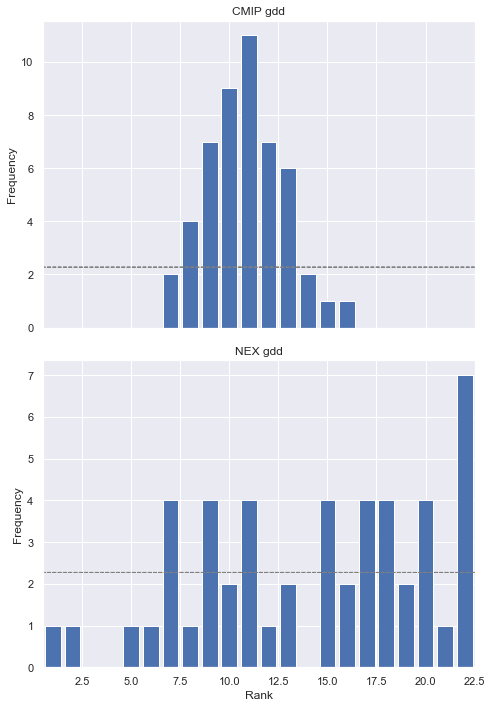

In [59]:
# CMIP calc
cmip_ens = cmip.query("AgVar == 'gdd' and Year <= 2005 and Year >= 1956").groupby(["Year"]).mean().drop(columns = ['GMFD','ensemble_mean']).T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("Year <= 2005")['gdd'].groupby(["Year"]).mean().values.reshape((50,1))
cmip_gdd = rankz(gmfd_obs, cmip_ens)

# NEX calc
nex_ens = nex.query("AgVar == 'gdd' and Year <= 2005 and Year >= 1956").groupby(["Year"]).mean().drop(columns = ['GMFD','ensemble_mean']).T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("Year <= 2005")['gdd'].groupby("Year").mean().values.reshape((50,1))
nex_gdd = rankz(gmfd_obs, nex_ens)

# Plot
fig, ax = plt.subplots(2,1, figsize = (7,10), sharex = True)

ax[0].bar(range(1,cmip_ens.shape[0]+2), cmip_gdd[0])
ax[0].arrow(0., 1/22. * 50, 22.5, 0., color="gray", ls = "--")
ax[1].bar(range(1,nex_ens.shape[0]+2), nex_gdd[0])
ax[1].arrow(0., 1/22. * 50, 22.5, 0., color="gray", ls = "--")

ax[0].set_title("CMIP gdd")
ax[1].set_title("NEX gdd")

ax[0].set_xlim([0.5,22.5])

ax[1].set_xlabel("Rank")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
# plt.savefig("./output/figs/gdd_rankHist.png", dpi = 500)
plt.show()

### eGDD

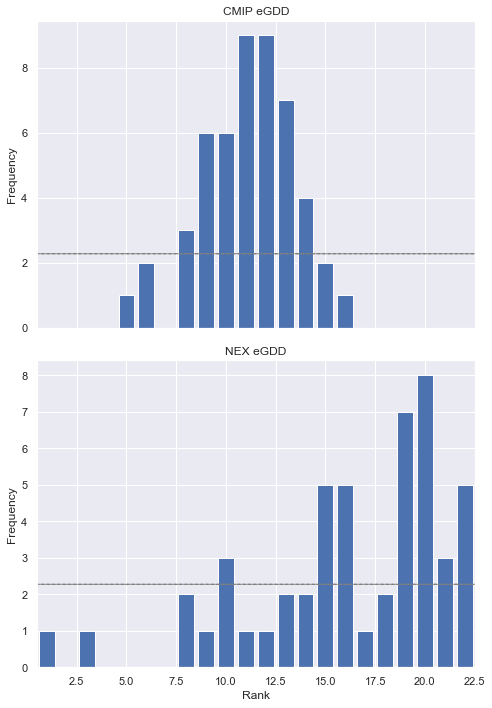

In [52]:
# CMIP calc
cmip_ens = cmip.query("AgVar == 'egdd' and Year <= 2005 and Year >= 1956").groupby(["Year"]).mean().drop(columns = ['GMFD','ensemble_mean']).T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("Year <= 2005")['egdd'].groupby(["Year"]).mean().values.reshape((50,1))
cmip_egdd = rankz(gmfd_obs, cmip_ens)

# NEX calc
nex_ens = nex.query("AgVar == 'egdd' and Year <= 2005 and Year >= 1956").groupby(["Year"]).mean().drop(columns = ['GMFD','ensemble_mean']).T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("Year <= 2005")['egdd'].groupby("Year").mean().values.reshape((50,1))
nex_egdd = rankz(gmfd_obs, nex_ens)

# Plot
fig, ax = plt.subplots(2,1, figsize = (7,10), sharex = True)

ax[0].bar(range(1,cmip_ens.shape[0]+2), cmip_egdd[0])
ax[0].arrow(0., 1/22. * 50, 22.5, 0., color="gray", ls = "--")
ax[1].bar(range(1,nex_ens.shape[0]+2), nex_egdd[0])
ax[1].arrow(0., 1/22. * 50, 22.5, 0., color="gray", ls = "--")

ax[0].set_title("CMIP eGDD")
ax[1].set_title("NEX eGDD")

ax[0].set_xlim([0.5,22.5])

ax[1].set_xlabel("Rank")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
# plt.savefig("./output/figs/egdd_rankHist.png", dpi = 500)
plt.show()

### Precip

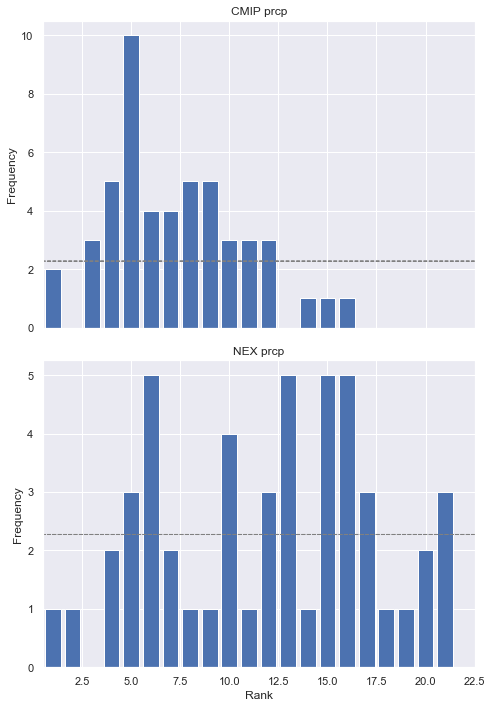

In [60]:
# CMIP calc
cmip_ens = cmip.query("AgVar == 'prcp' and Year <= 2005 and Year >= 1956").groupby(["Year"]).mean().drop(columns = ['GMFD','ensemble_mean']).T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("Year <= 2005")['prcp'].groupby(["Year"]).mean().values.reshape((50,1))
cmip_prcp = rankz(gmfd_obs, cmip_ens)

# NEX calc
nex_ens = nex.query("AgVar == 'prcp' and Year <= 2005 and Year >= 1956").groupby(["Year"]).mean().drop(columns = ['GMFD','ensemble_mean']).T.values.reshape((21,50,1))
gmfd_obs = gmfd.query("Year <= 2005")['prcp'].groupby("Year").mean().values.reshape((50,1))
nex_prcp = rankz(gmfd_obs, nex_ens)

# Plot
fig, ax = plt.subplots(2,1, figsize = (7,10), sharex = True)

ax[0].bar(range(1,cmip_ens.shape[0]+2), cmip_prcp[0])
ax[0].arrow(0., 1/22. * 50, 22.5, 0., color="gray", ls = "--")
ax[1].bar(range(1,nex_ens.shape[0]+2), nex_prcp[0])
ax[1].arrow(0., 1/22. * 50, 22.5, 0., color="gray", ls = "--")

ax[0].set_title("CMIP Precip")
ax[1].set_title("NEX Precip")

ax[0].set_xlim([0.5,22.5])

ax[1].set_xlabel("Rank")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
# plt.savefig("./output/figs/prcp_rankHist.png", dpi = 500)
plt.show()